In [ ]:
!pip install pyfoam pandas

In [1]:
from IPython.display import Latex
from PyFoam.RunDictionary.SolutionDirectory import SolutionDirectory
from PyFoam.RunDictionary.ParsedParameterFile import ParsedParameterFile
from PyFoam.Basics.DataStructures import Vector
import numpy as np
import pandas as pd
from scipy.signal import find_peaks
import os,shutil,glob
import pylab, re
import matplotlib.pyplot as plt
from tikzplotlib import save as tikz_save

In [2]:
A = pd.read_csv('/home/andres/OpenFOAM/andres-7/run/alaPruebas/ala8Hz/fluid/postProcessing/forceCoeffsIncompressible/1.5/forceCoefficients.dat',
                skiprows=8,delimiter='\t')

In [3]:
t, Cm, Cd, Cl, Clf, Clr =  A.to_numpy().T

In [4]:
Cd.argmax()
nmaxs =  find_peaks(Cd,distance=50)[0]

Cd_m = Cd[nmaxs[0]:nmaxs[-1]].mean()

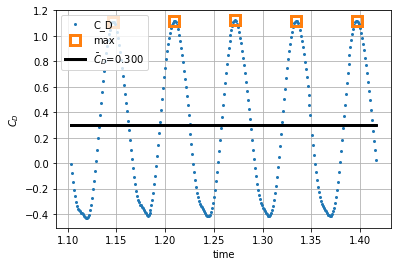

In [5]:
fig,ax = plt.subplots()
ax.plot(t,Cd,'o',markersize=2,label='C_D')
ax.plot(t[nmaxs],Cd[nmaxs],'s',fillstyle='none',markersize=10,markeredgewidth=3,label='max')
ax.plot(t,Cd_m+t*0,color='k',linewidth=3,label=r'$\bar C_D$'+f'={Cd_m:.3f}')
ax.set_xlabel('time')
ax.set_ylabel('$C_D$')
ax.grid()
ax.legend()
tikz_save('CD_ref.tikz')